In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import numpy as np
import time
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from metaperceptron import Data
import warnings
warnings.filterwarnings('ignore')


from numpy.random import normal, rand, choice, uniform
from numpy import mean, pi, sin, cos, array,zeros
from math import gamma
import numpy
from copy import deepcopy
import random as rande
import math
from numpy import where
import time
import csv


In [2]:
import random
import random as rande
import numpy as np
import numpy
import math
import matplotlib.pyplot as plt

from numpy.random import uniform, normal, randint, rand
from numpy import exp, pi, sin, cos, zeros, minimum, maximum, abs, where, sign, mean, stack
from numpy import min as np_min
from numpy import max as np_max
from copy import deepcopy

from numpy import where, clip, logical_and, maximum, minimum, power, sin, abs, pi, sqrt, sign, ones, ptp, min, sum, array, ceil, multiply, mean
from numpy.random import uniform, random, normal, choice
from math import gamma

import time
import csv

ID_MIN_PROB = 0
ID_MAX_PROB = -1
ID_POS = 0  
ID_FIT = 1

EPSILON = 10E-10
DEFAULT_BATCH_IDEA = False
DEFAULT_BATCH_SIZE = 10
DEFAULT_LB = -1
DEFAULT_UB = 1

class solution:
    def __init__(self):
        self.best = 0
        self.bestIndividual = []
        self.convergence = []
        self.optimizer = ""
        self.objfname = ""
        self.startTime = 0
        self.endTime = 0
        self.executionTime = 0
        self.lb = 0
        self.ub = 0
        self.dim = 0
        self.popnum = 0
        self.maxiers = 0




def WMFO(objf, lb, ub, dim, SearchAgents_no, Max_iter,verbose=False):

    Convergence_curve = numpy.zeros(Max_iter)

    soll = solution()
    timerStart = time.time()
    soll.startTime = time.strftime("%Y-%m-%d-%H-%M-%S")

 
    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim    
    epochs = Max_iter
    pop_size = SearchAgents_no

    epochs = Max_iter
    problem_size = dim
    ID_WEI = 2
 

    pop_moths = [create_solution(lb,ub,objf,problem_size) for _ in range(SearchAgents_no)]
   
    pop_flames, g_best = get_sorted_pop_and_global_best_solution(pop=pop_moths, id_fit=ID_FIT, id_best=ID_MIN_PROB)     # Eq.(2.6)
    g_worst = pop_flames[-1]
    problem_size = dim
    
    for epoch in range(epochs):
            

            num_flame = round(SearchAgents_no - (epoch + 1) * ((SearchAgents_no - 1) / epochs))

            
            a = -1 + (epoch + 1) * ((-1) / epochs)
            for i in range(SearchAgents_no):
                r = rande.random()

                distance_to_flame = abs(pop_flames[i][ID_POS] - pop_moths[i][ID_POS])
                t = (a - 1) * uniform(0, 1, problem_size) + 1
                b = 1
                
                temp_1 = distance_to_flame * exp(b * t) * cos(t * 2 * pi) + pop_flames[i][ID_POS]


                temp_2 = distance_to_flame * exp(b * t) * cos(t * 2 * pi) + g_best[ID_POS]

                list_idx = i * ones(problem_size)
                pos_new = where(list_idx < num_flame, temp_1, temp_2)

                
                r1 = rande.random()  
                r2 = rande.random() 
                a1 = 1 - epoch * ((1) / epochs)
                r4 = rande.random()
                A =  2 * a1 * r1 - a1  
                C = 2 * r2 
                Xnew = r4*g_best[ID_POS] - A * abs(C*g_best[ID_POS]-pos_new)+ (1-r4)* g_worst[ID_POS]
            
                if objf(Xnew)< objf(pos_new):
                    pos_new=Xnew                  
                    pos_new = amend_position_faster(pos_new,lb,ub)
                
                fit_new = get_fitness_position(objf,pos_new)
                if fit_new < pop_moths[i][ID_FIT]:
                    pop_moths[i] = [pos_new, fit_new]


            pop_flames = pop_flames + pop_moths
            pop_flames, g_best = update_sorted_population_and_global_best_solution(pop_flames, ID_MIN_PROB, g_best)
            pop_flames = pop_flames[:SearchAgents_no]
            g_worst = pop_flames[-1]

            Convergence_curve[epoch] = g_best[ID_FIT]
            if verbose:
                print("> Epoch: {}, Best fit: {}".format(epoch + 1, g_best[ID_FIT]))

    print(f"{g_best[ID_FIT]:e}")

    timerEnd = time.time()
    soll.endTime = time.strftime("%Y-%m-%d-%H-%M-%S")
    soll.executionTime = timerEnd - timerStart
    soll.convergence = Convergence_curve
    soll.optimizer = "WMFO"
    soll.objfname = objf.__name__
    soll.best = g_best[ID_FIT]    
    soll.bestIndividual = g_best[ID_POS]
    return soll

def update_sorted_population_and_global_best_solution(pop=None, id_best=None, g_best=None):
    sorted_pop = sorted(pop, key=lambda temp: temp[ID_FIT])
    current_best = sorted_pop[id_best]
    g_best = deepcopy(current_best) if current_best[ID_FIT] < g_best[ID_FIT] else deepcopy(g_best)
    return sorted_pop, g_best
def amend_position_faster(position, lb, ub):
    #return clip(position, lb, ub)
    return np.where(np.logical_and(lb <= position, position <= ub), position, np.random.uniform(lb, ub))

def create_solution(lb , ub, obj_func,dim,minmax=0):
    position = uniform(lb,ub)
    fitness = get_fitness_position(obj_func, position=position, minmax=minmax)
    weight = zeros(dim)
    return [position, fitness,weight]

def get_sorted_pop_and_global_best_solution(pop=None, id_fit=None, id_best=None):
    sorted_pop = sorted(pop, key=lambda temp: temp[id_fit])
    return sorted_pop, deepcopy(sorted_pop[id_best])


def get_fitness_position(obj_func,position, minmax=0):
    fit_new = obj_func(position)
    return fit_new if minmax == 0 else 1.0 / (fit_new + EPSILON)
def weighted_lehmer_mean(list_objects, list_weights):
    up = list_weights * list_objects ** 2
    down = list_weights * list_objects
    return sum(up) / sum(down)

def update_global_best_solution(pop=None, id_best=None, g_best=None):
    sorted_pop = sorted(pop, key=lambda temp: temp[ID_FIT])
    current_best = sorted_pop[id_best]
    return deepcopy(current_best) if current_best[ID_FIT] < g_best[ID_FIT] else deepcopy(g_best)
def get_global_best_solution(pop=None, id_fit=None, id_best=None):
    sorted_pop = sorted(pop, key=lambda temp: temp[id_fit])
    return deepcopy(sorted_pop[id_best])



def mlp_objective_function(params):
    shapes = [w.shape for w in mlp.model.coefs_ + mlp.model.intercepts_]
    params = numpy.split(params, numpy.cumsum([numpy.prod(shape) for shape in shapes]))

    
    for i in range(len(mlp.model.coefs_)):
        mlp.model.coefs_[i] = params[i].reshape(shapes[i])
    for i in range(len(mlp.model.intercepts_)):
        mlp.model.intercepts_[i] = params[len(mlp.model.coefs_) + i].reshape(shapes[len(mlp.model.coefs_) + i])


    mlp.fit(data.X_train, data.y_train.ravel())
    y_pred = mlp.predict(data.X_test)
    mse = mean_squared_error(data.y_test, y_pred)

    return mse


In [3]:

def mlp_objective_function(params):
    shapes = [w.shape for w in mlp.model.coefs_ + mlp.model.intercepts_]
    params = numpy.split(params, numpy.cumsum([numpy.prod(shape) for shape in shapes]))


    for i in range(len(mlp.model.coefs_)):
        mlp.model.coefs_[i] = params[i].reshape(shapes[i])
    for i in range(len(mlp.model.intercepts_)):
        mlp.model.intercepts_[i] = params[len(mlp.model.coefs_) + i].reshape(shapes[len(mlp.model.coefs_) + i])

    mlp.fit(data.X_train, data.y_train.ravel())
    y_pred = mlp.predict(data.X_test)
    mse = mean_squared_error(data.y_test, y_pred)

    return mse

class MLPRegression(object):
    def __init__(self, inputSize, outputSize, hiddenLayerSizes):
        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenLayerSizes = hiddenLayerSizes
        self.model = MLPRegressor(activation='relu', hidden_layer_sizes=hiddenLayerSizes, batch_size=32, solver='lbfgs', learning_rate='constant', learning_rate_init=1e-3, random_state=2)
        

    def predict(self, X):
        return self.model.predict(X)

    def fit(self, X, y):
        self.model.fit(X, y)

    def get_weights_and_biases(self):
        weights = self.model.coefs_
        biases = self.model.intercepts_
        return weights, biases

    def establish_model(self, params):
        shapes = [w.shape for w in self.model.coefs_ + self.model.intercepts_]
        params = numpy.split(params, numpy.cumsum([numpy.prod(shape) for shape in shapes]))

        for i in range(len(self.model.coefs_)):
            self.model.coefs_[i] = params[i].reshape(shapes[i])
        for i in range(len(self.model.intercepts_)):
            self.model.intercepts_[i] = params[len(self.model.coefs_) + i].reshape(shapes[len(self.model.coefs_) + i])




In [4]:

inputSize = 5
outputSize = 1
hiddenLayerSizes = (30, 15, 5)


df=pd.read_csv('Finland.csv')

output=['CO2']
features=['FR', 'GASF', 'GDP', 'OIF', 'REC', 'PR',] #
 
X=df[features].values
y=df[output].values

data = Data(X, y)

data.split_train_test(test_size=0.2, random_state=2, inplace=True)
print(data.X_train.shape, data.X_test.shape)


data.X_train, scaler_X = data.scale(data.X_train, scaling_methods=("standard", "minmax"))
data.X_test = scaler_X.transform(data.X_test)

data.y_train, scaler_y = data.scale(data.y_train, scaling_methods=("standard", "minmax"))
data.y_test = scaler_y.transform(data.y_test)

print(type(data.X_train), type(data.y_train))


mlp = MLPRegression(inputSize, outputSize, hiddenLayerSizes)


mlp.fit(data.X_train, data.y_train)


weights, biases = mlp.get_weights_and_biases()

initial_params = numpy.concatenate([w.flatten() for w in weights + biases])
shapes = [w.shape for w in weights + biases]


lb = -1.0
ub = 1.0
PopSize = 20
iters = 50
problem_size=len(initial_params)


wmfo_solution = WMFO(mlp_objective_function, lb, ub, problem_size, PopSize, iters)

result = wmfo_solution


Flag = False
def storedata(p):
    import csv
    global Flag
    ExportToFile = "WMFO.csv"
    CnvgHeader = []
    with open(ExportToFile, "a", newline="\n") as out:
        writer = csv.writer(out, delimiter=",")
        if (Flag == False): 
            header = np.concatenate([["Optimizer", "objfname", "ExecutionTime", "best"], CnvgHeader])
            writer.writerow(header)
            Flag = True
        a = np.concatenate([[p.optimizer, p.objfname, p.executionTime, p.best], p.convergence])
        writer.writerow(a)
        out.close()

storedata(result)

y_pred_train = mlp.predict(data.X_train)
y_pred = mlp.predict(data.X_test)

train_prediction = y_pred_train
test_prediction = y_pred
y_train_gen = data.y_train
y_test_gen = data.y_test




(102, 6) (26, 6)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
1.864812e-03


In [5]:
from permetrics import RegressionMetric
evaluator_train = RegressionMetric(y_train_gen, train_prediction, decimal=6)
evaluator_test = RegressionMetric(y_test_gen, test_prediction, decimal=6)

name = "MLP-WMFO"
name_model = ['Mode', 'NNSE_Train', 'NNSE_Test', 'R2_Train', 'R2_Test', 'MSE_Train', 'MSE_Test', 'MSLE_Train', 'MSLE_Test', 'MAE_Train', 'MAE_Test']
print(*name_model, sep='\t')
model_result = [name,
                evaluator_train.NNSE(),
               evaluator_test.NNSE(),
               evaluator_train.R2(),
               evaluator_test.R2(),
               evaluator_train.MSE(),
               evaluator_test.MSE(),
               evaluator_train.MSLE(),
               evaluator_test.MSLE(),
               evaluator_train.MAE(),
               evaluator_test.MAE(),]
print(*model_result, sep='\t')


Mode	NNSE_Train	NNSE_Test	R2_Train	R2_Test	MSE_Train	MSE_Test	MSLE_Train	MSLE_Test	MAE_Train	MAE_Test
MLP-WMFO	0.983429	0.973289	0.98315	0.972556	0.001085	0.001865	0.00043	0.00072	0.02486	0.034572


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


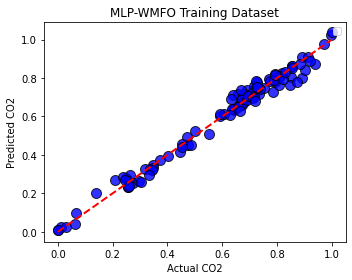

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


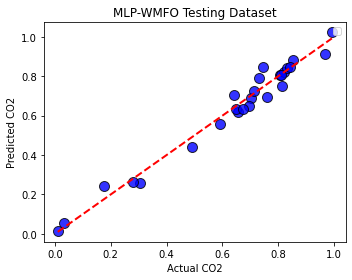

In [6]:

plt.figure(figsize=(5, 4))
plt.scatter(data.y_train, np.asarray(y_pred_train).flatten(), c='blue', s=100, alpha = 0.8, edgecolor='black', linewidth=1)

plt.plot([min(data.y_train), max(data.y_train)], [min(data.y_train), max(data.y_train)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')
plt.title(f'{name} Training Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.grid(False)
plt.savefig(f'{name} Training.png')
plt.show()


plt.figure(figsize=(5, 4))
plt.scatter(data.y_test, np.asarray(y_pred).flatten(), c='blue', s=100, alpha = 0.8, edgecolor='black', linewidth=1)

plt.plot([min(data.y_test), max(data.y_test)], [min(data.y_test), max(data.y_test)], color='red', linestyle='--', linewidth=2 )
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')
plt.title(f'{name} Testing Dataset')
plt.legend(loc='best')
plt.tight_layout()
plt.grid(False)
plt.savefig(f'{name} Testing.png')
plt.show()


#-----------------------------------------------------

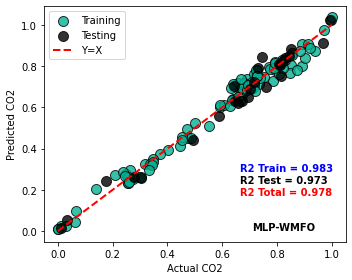

In [8]:
import matplotlib.pyplot as plt
import numpy as np



pred_color = '#04b293'

plt.figure(figsize=(5, 4))


plt.scatter(data.y_train, np.asarray(y_pred_train).flatten(), c=pred_color, s=100, alpha=0.8, label='Training', edgecolor='black', linewidth=1)


plt.scatter(data.y_test[:len(y_pred)], np.asarray(y_pred).flatten(), c='black', s=100, alpha=0.8, label='Testing', edgecolor='black', linewidth=1)


min_val = min([np.min(data.y_train), np.min(data.y_test)])
max_val = max(np.max(data.y_train), np.max(data.y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Y=X', linewidth=2)


plt.text(0.65, 0.30, f'R2 Train = {evaluator_train.R2():.3f}', transform=plt.gca().transAxes, color='blue',weight='bold')
plt.text(0.65, 0.25, f'R2 Test = {evaluator_test.R2():.3f}', transform=plt.gca().transAxes, color='black',weight='bold')
guu = (evaluator_train.R2() + evaluator_test.R2())/2
plt.text(0.65, 0.20, f'R2 Total = {guu:.3f}', transform=plt.gca().transAxes, color='red',weight='bold')
plt.text(0.69, 0.05, f'{name}', transform=plt.gca().transAxes, color='black',weight='bold')


plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')
plt.legend(loc='best')
plt.tight_layout()
plt.grid(False)
plt.savefig(f'{name} Combined.png')
plt.show()



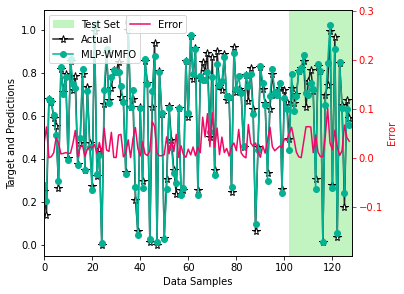

In [9]:
name1 = 'Actual'
name2 = name


y_pred_train_original_scale = y_pred_train.reshape(-1, 1)
y_pred_test_original_scale =  y_pred.reshape(-1, 1)

y_train_original_scale = data.y_train.reshape(-1, 1)
y_test_original_scale = data.y_test.reshape(-1, 1)


error_train = np.abs(y_train_original_scale - y_pred_train_original_scale)
error_test = np.abs(y_test_original_scale - y_pred_test_original_scale)


combined_ground_truth = np.concatenate([y_train_original_scale, y_test_original_scale])
combined_predictions = np.concatenate([y_pred_train_original_scale, y_pred_test_original_scale])
combined_error = np.concatenate([error_train, error_test])


fig, ax1 = plt.subplots(figsize=(5, 4))
plt.tight_layout()

ax1.axvspan(len(y_train_original_scale), len(combined_ground_truth), color='#c2f4c2', label='Test Set') #alpha=0.5,


ax1.plot(combined_ground_truth, label=name1, color='#262626', marker='*', markersize=8, markerfacecolor='white', markeredgecolor='black')
ax1.plot(combined_predictions, label=name2, color=pred_color, marker='o', markersize=6, markerfacecolor=pred_color, markeredgecolor=pred_color)


ax1.set_xlabel('Data Samples')
ax1.set_ylabel('Target and Predictions', color='#000000')
ax1.tick_params('y', colors='black')


ax2 = ax1.twinx()
ax2.plot(combined_error, label='Error', color='#f00866',) 
ax2.set_ylim(bottom=min(combined_error) - 0.2, top=max(combined_error) + 0.2)
ax2.set_ylabel('Error', color='red')
ax2.tick_params('y', colors='red')
plt.margins(x=0)
ax1.margins(x=0)
ax2.margins(x=0)


ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0.25, 1))

plt.savefig(name2+'Error.png', dpi=300, bbox_inches='tight')



plt.show()

1.864812e-03
Permutation Importances:
OIF: 0.4098977340951492
GDP: 0.40628793825504844
GASF: 0.2656556349335589
REC: 0.13659910063467334
FR: 0.08085092325569089
PR: 0.0655184907455387


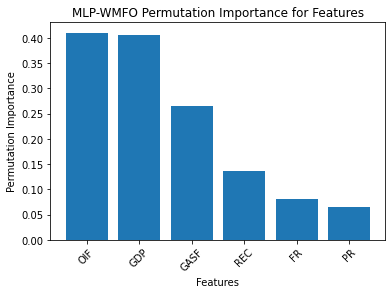

In [10]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


class MLPWMFOWrapper:
    def __init__(self, model, obj_function):
        self.modell = model
        self.obj_function = obj_function

    def fit(self, X, y):

        result = WMFO(self.obj_function, lb, ub, problem_size, PopSize, iters)

       
        self.modell.fit(X, y)

    def score(self, X, y):
        y_pred = self.modell.predict(X)
        return -mean_squared_error(y, y_pred, squared=False)
    
    
MLPWMFO_wrapper = MLPWMFOWrapper(mlp, mlp_objective_function)
MLPWMFO_wrapper.fit(data.X_train, data.y_train)


perm_importance = permutation_importance(MLPWMFO_wrapper, data.X_test, data.y_test, n_repeats=20, random_state=42)


sorted_idx = perm_importance.importances_mean.argsort()[::-1]
print("Permutation Importances:")
for idx in sorted_idx:
    print(f"{features[idx]}: {perm_importance.importances_mean[idx]}")


plt.bar(range(data.X_test.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.xticks(range(data.X_test.shape[1]), [features[i] for i in sorted_idx], rotation=45)
plt.xlabel("Features")
plt.ylabel("Permutation Importance")
plt.grid(False)
plt.title(f"{name} Permutation Importance for Features")
plt.savefig(f'{name} Permutation.png')
plt.show()

